# R Workbook 2: What is the Difference by Year?

In previous workbook, we looked at how to bring in a dataset in a Pandas Data Frame and explore it. In this workbook, we'll explore more of how we can use Python to automate and speed up analysis. In addition, we'll look at using basic visualizations.

## <span style = "color:green">Motivating Question</span>

So far, we've only looked at data from 2015. However, part of what makes the LODES data so useful is the availability of the data over many years. The data are available in multiple CSV files. There are many insights we might find from analyzing data over years, so we want to be able to bring them all together. In this notebook, we'll explore how to do that as we try to answer the following questions:

**What is the difference in the number of jobs by age group and by year? What are the different trends across years?**

To answer these, we'll introduce you to creating Python functions to make reading datasets easier. Then, we'll use them within loops to automate reading in datasets. Finally, we'll show some basic visualizations with the data that we get to bring it all together.

## Starting Out
As before, we'll start by loading libraries. We have a few more commands we'll be running in the beginning since we're also going to be doing some visualizations.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## <span style="color:green">Creating Functions (VIDEO)</span>

First, we start off by creating a function. You're familiar with functions in general already, since you've used them to do various things like determining the type of an object (by using `class()`) or finding the mean of a list of numbers (using `mean()`). Here, we'll walk through creating your own function. This helps simplify your code make it much more readable if you're going to be doing the same thing many times, as you won't have to copy and paste your code each time you want to do a certain task.

Let's start with a very basic function. Suppose we want a function that takes an argument and returns the squared value. 

In [2]:
squarer <- function(x){
    y = x^2
    return(y)
}

In [3]:
squarer(4)

[1] 16

Here, we're creating a function called `squarer` which takes an input, `x`, and outputs the squared value. Let's break it down line by line.

    squarer <- function(x){
        return()
    }

The `function` indicates that we're defining a function. This is being assigned to `squarer`, so that is what the name of our function will be. Then, in parentheses, we put in any arguments we want the function to take. If we don't want it to take any arguments, we can just leave it blank. Lastly, we end the line with a colon. 

This takes us to the next lines. 

    y = x^2
    return(y) 
    
Here, we have two lines, which assigns the value `x^2` to `y`, then uses the `return` function to output it. 

Lastly, we have unindented lines, which aren't part of the function.
    
    squarer(4)

This just uses the function with the argument `4` to see if it works and gives us a value of 16. 

In [13]:
str_replace_all('{st}/wac/{st}_wac_S000_JT00_{yr}.csv.gz', '\\{st\\}', 'ca') 

[1] "ca/wac/ca_wac_S000_JT00_{yr}.csv.gz"

In [23]:
get_data <- function(state, year){
    base_url <- 'https://lehd.ces.census.gov/data/lodes/LODES7/'
    file_specs <- str_replace_all('STATE/wac/STATE_wac_S000_JT00_YEAR.csv.gz', 'STATE', state) %>% str_replace_all('YEAR', year)
    file_name <- paste(base_url, file_specs, sep = '')
    
    return(read_csv(file_name))
}

In [25]:
df <- get_data('ca', '2015')

Parsed with column specification:
cols(
  .default = col_double(),
  w_geocode = col_character()
)

See spec(...) for full column specifications.



We need to change the location of the file depending what year we want to get. We do this by using the `format()` method on a string. Notice that in the string

    https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_{yr}.csv.gz

we have a part with curly braces, `{yr}`. This is followed by an argument in `format()` of `yr = year`. This means that whenever we see `{yr}` in the string, we replace it with whatever is in `year`. This gives us the string we want. For example, if the year we want is 2015, the file is at `https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_2015.csv.gz`.

In this function, we put the Data Frame that we want in `output`. The line

    output = read_csv(file_name)

should look relatively familiar to you, since we've used the `read_csv()` method before.

Finally, we use the `return()` statement to give the result of our function, which is the Data Frame that we put in `output`. 

Let's try using this function to get the dataset from 2015.

## Loops in R

In [2]:
for(i in 1:10){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


## Visualizations using `qplot`
    
Visualizations can help us look at summaries of the data. They can also aid in providing good presentation aids.

In this section, we'll look at a few basic types of visualizations: histograms, boxplots, lineplots. In practice, there are many more types of visualizations. Furthermore, there are many different packages that can help you create these different visualizations. While we'll focus only on the basics here with the `ggplot2` package, keep in mind that there are many tools available.

### Making a Histogram
We'll start with a basic histogram. A histogram is useful for looking at the distribution of a numerical variable (that is, a variable that takes numbers as its values as opposed to categories). They can visually represent the spread and center of the variable, as well as provide insights to the shape of the distribution. For example, we can look at the number of **modes**, or peaks, in the data, which wouldn't be captured in numerical summaries such as mean or variance. We can also get a better idea of the **skew** of the data, determining whether most units are grouped on the left or right side (lower or higher values), or whether it's mostly symmetrical. 

We'll first look at the simplest way to make a graph, then show how to customize it using the plotting parameters as well as Figure and Axes objects. Let's look at a histogram of the total jobs in the 2015 Workplace Area Characteristics for California.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



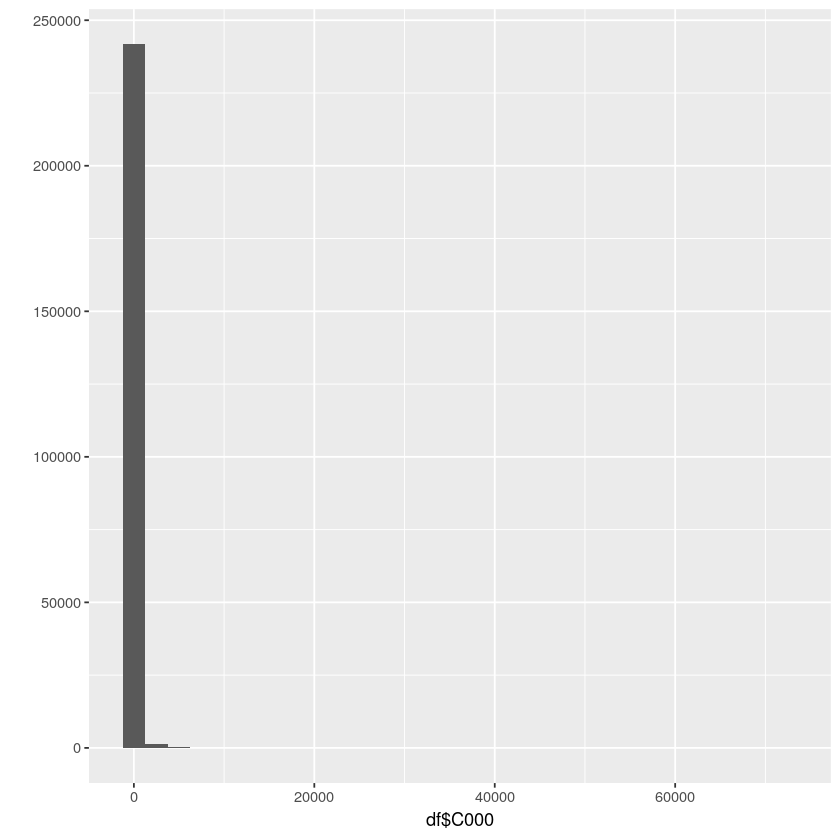

In [26]:
qplot(df$C000)

In [1]:
?qplot

No documentation for ‘qplot’ in specified packages and libraries:
you could try ‘??qplot’